## House Price Prediction - Advance Regression Assignment

The solution is divided into the following sections: 
- Data understanding and exploration and cleaning
- Data preparation
- Model building and evaluation

### 1. Data understanding and exploration

In [74]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("CarPrice_Assignment.csv")

In [75]:
#fetching data
df = pd.read_csv("train.csv",  sep = ',', header= 0 )
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
# Identify Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [77]:
# Dropping columns due to insufficient data

df.drop(['Alley','PoolQC','Fence','MiscFeature','MoSold','Id'],inplace=True,axis=1)

#### Target Variable - SalesPrice Analysis

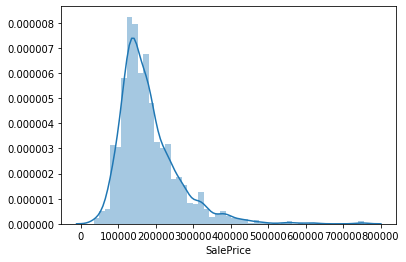

In [78]:
sns.distplot(df['SalePrice'])

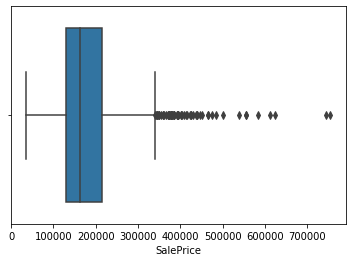

In [79]:
sns.boxplot(df['SalePrice'])

In [80]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Data Exploration

#### Exploring Categorical Data

#### Top three expensive sites in Ames City 

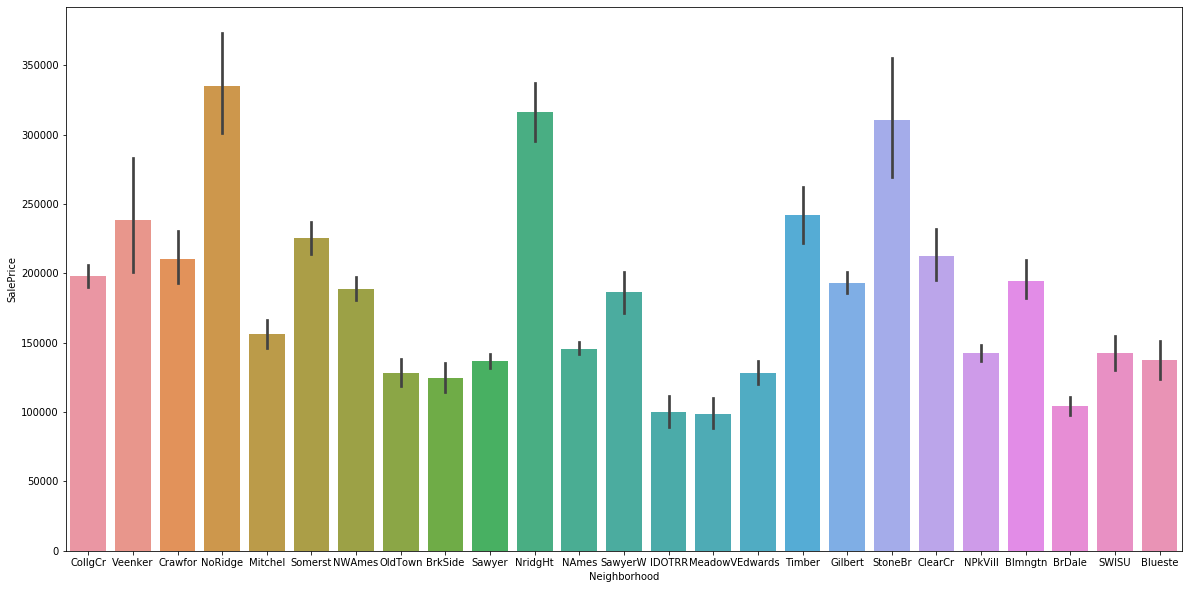

In [81]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df)
# Top three expensive sites in Ames City
#1. Northridge
#2. Northridge Heights
#3. Stone Brook

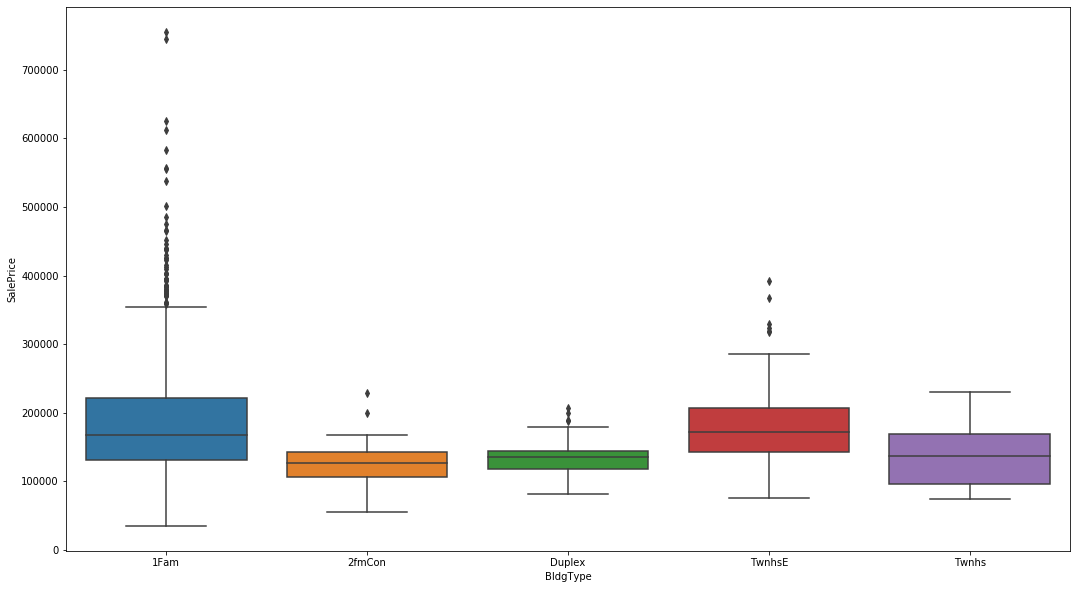

In [82]:
plt.figure(figsize=(18, 10))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)

#### Appearance of House

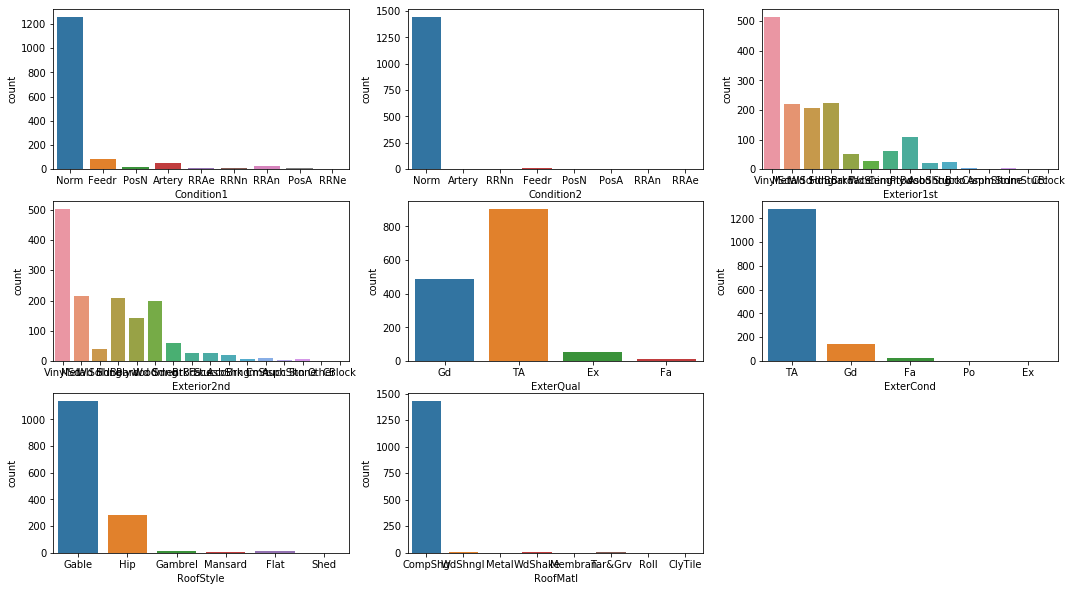

In [83]:
plt.figure(figsize=(18, 10))

plt.subplot(3,3,1)
sns.countplot(x = 'Condition1', data = df)
# Can be dropped

plt.subplot(3,3,2)
sns.countplot(x = 'Condition2', data = df)
# Can be dropped

plt.subplot(3,3,3)
sns.countplot(x = 'Exterior1st', data = df)

plt.subplot(3,3,4)
sns.countplot(x = 'Exterior2nd', data = df)

plt.subplot(3,3,5)
sns.countplot(x = 'ExterQual', data = df)

plt.subplot(3,3,6)
sns.countplot(x = 'ExterCond', data = df)

plt.subplot(3,3,7)
sns.countplot(x = 'RoofStyle', data = df)

plt.subplot(3,3,8)
sns.countplot(x = 'RoofMatl', data = df)
# Can be dropped


In [84]:
df.drop(['Condition1','Condition2','RoofMatl'],inplace=True,axis=1)

#### Construction/Quality of House

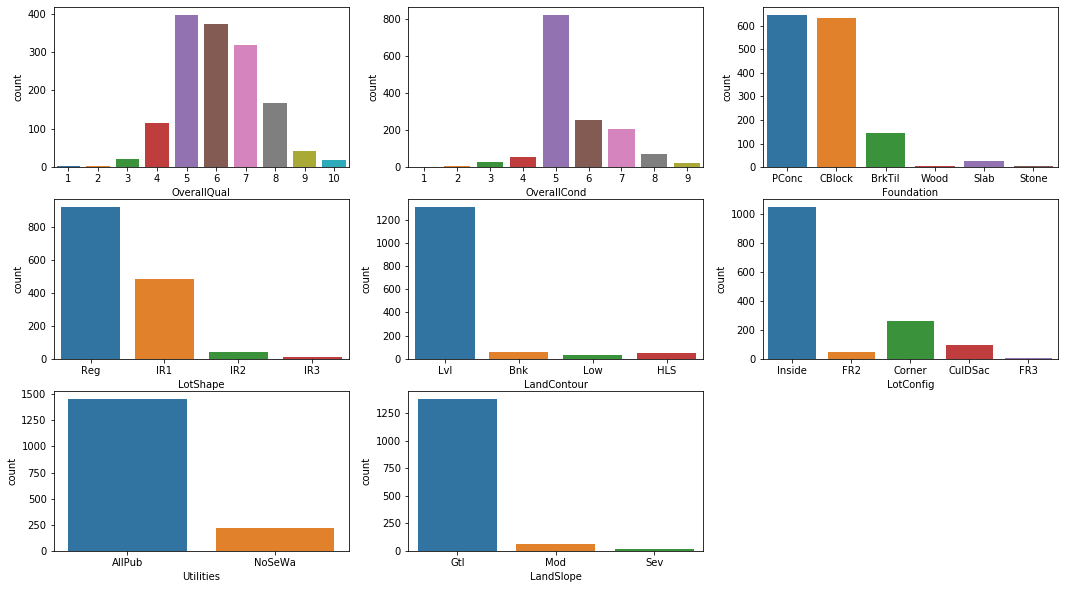

In [85]:

plt.figure(figsize=(18, 10))

plt.subplot(3,3,1)
sns.countplot(x = 'OverallQual', data = df)

plt.subplot(3,3,2)
sns.countplot(x = 'OverallCond', data = df)

plt.subplot(3,3,3)
sns.countplot(x = 'Foundation', data = df)

plt.subplot(3,3,4)
sns.countplot(x = 'LotShape', data = df)

plt.subplot(3,3,5)
sns.countplot(x = 'LandContour', data = df)
# Can be dropped

plt.subplot(3,3,6)
sns.countplot(x = 'LotConfig', data = df)

plt.subplot(3,3,7)
sns.countplot(x = 'MSZoning', data = df)

plt.subplot(3,3,7)
sns.countplot(x = 'Utilities', data = df)
# Can be dropped

plt.subplot(3,3,8)
sns.countplot(x = 'LandSlope', data = df)
# Can be dropped

In [86]:
df.drop(['LandContour','Utilities','LandSlope'],inplace=True,axis=1)

#### Amenities of House

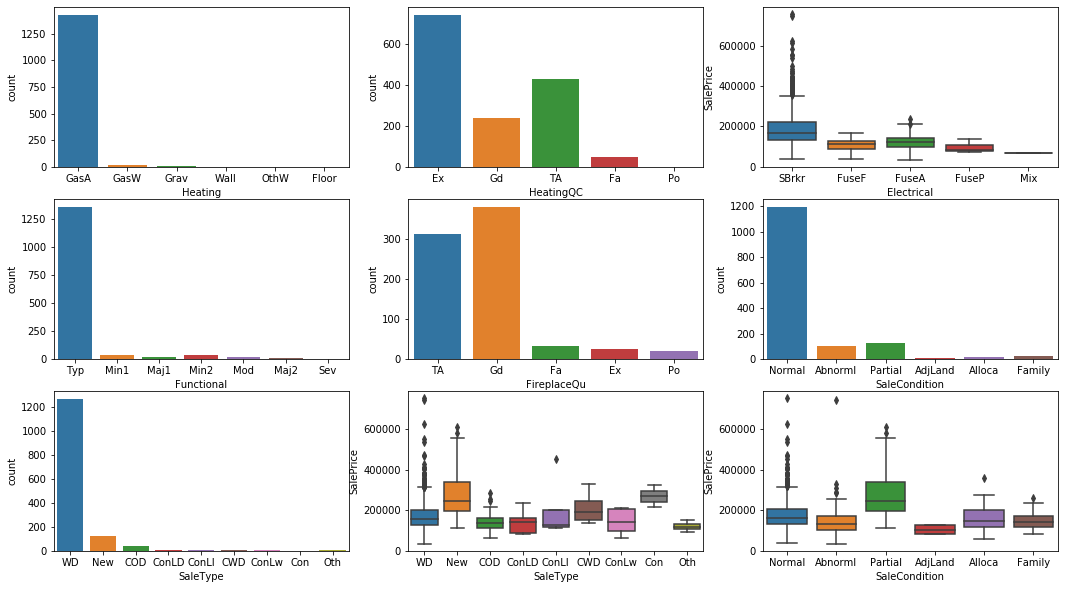

In [87]:
plt.figure(figsize=(18, 10))

plt.subplot(3,3,1)
sns.countplot(x = 'Heating', data = df)
#Can be dropped - Skew Category

plt.subplot(3,3,2)
sns.countplot(x = 'HeatingQC', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'Electrical',y='SalePrice', data = df)
#Can be dropped - Skew Category

plt.subplot(3,3,4)
sns.countplot(x = 'Functional', data = df)
#Can be dropped - Skew Category

plt.subplot(3,3,5)
sns.countplot(x = 'FireplaceQu', data = df)
#Can be dropped due to Missing Values

plt.subplot(3,3,6)
sns.countplot(x = 'SaleCondition', data = df)
# Can be dropped - Skew Category

plt.subplot(3,3,7)
sns.countplot(x = 'SaleType', data = df)
# Can be dropped - Skew Category

plt.subplot(3,3,8)
sns.boxplot(x = 'SaleType',y='SalePrice', data = df)

plt.subplot(3,3,9)
sns.boxplot(x = 'SaleCondition',y='SalePrice', data = df)
# Can be Dropped - Skew Category

In [88]:
df.drop(['Heating','Electrical','Functional','FireplaceQu','SaleCondition'],inplace=True,axis=1)

#### Binary Count to Sale Type 

In [89]:
# Replace String into its area of application i.e. vehicle_category (str type only)

df.SaleType[df.SaleType == 'WD'] = 1
df.SaleType[df.SaleType == 'CWD'] = 1
df.SaleType[df.SaleType == 'COD'] = 1
df.SaleType[df.SaleType == 'ConLw'] = 1
df.SaleType[df.SaleType == 'ConLI'] = 1
df.SaleType[df.SaleType == 'ConLD'] = 1
df.SaleType[df.SaleType == 'Oth'] = 1
df.SaleType[df.SaleType == 'New'] = 2
df.SaleType[df.SaleType == 'Con'] = 1

In [90]:
df['SaleType'] = pd.to_numeric(df['SaleType'])

In [91]:
bins=[0,1,2]
slot=['Other','New']
df['SaleType']=pd.cut(df['SaleType'],bins,right=True,labels=slot)

# Other ---- Other type
# New ---- New

#### Age of House 

In [92]:
df['Sold_Age']=df['YrSold']-df['YearRemodAdd']
# Age of house at time of sale

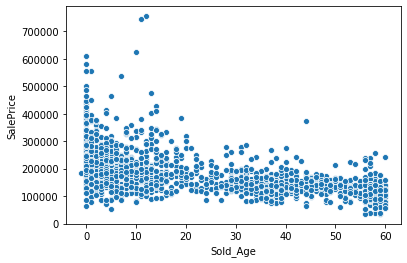

In [93]:
sns.scatterplot(x='Sold_Age',y='SalePrice',data=df)

In [94]:
df.drop(['YearBuilt','YearRemodAdd'],inplace=True,axis=1)

#### Basement of House 

In [95]:
# Replacing NA with No Basement (NB)
# Meaningful Missing

df['BsmtQual'].fillna("NB",inplace=True)
df['BsmtCond'].fillna("NB",inplace=True)
df['BsmtExposure'].fillna("NB",inplace=True)
df['BsmtFinType1'].fillna("NB",inplace=True)
df['BsmtFinType2'].fillna("NB",inplace=True)
df['BsmtUnfSF'].fillna("NB",inplace=True)

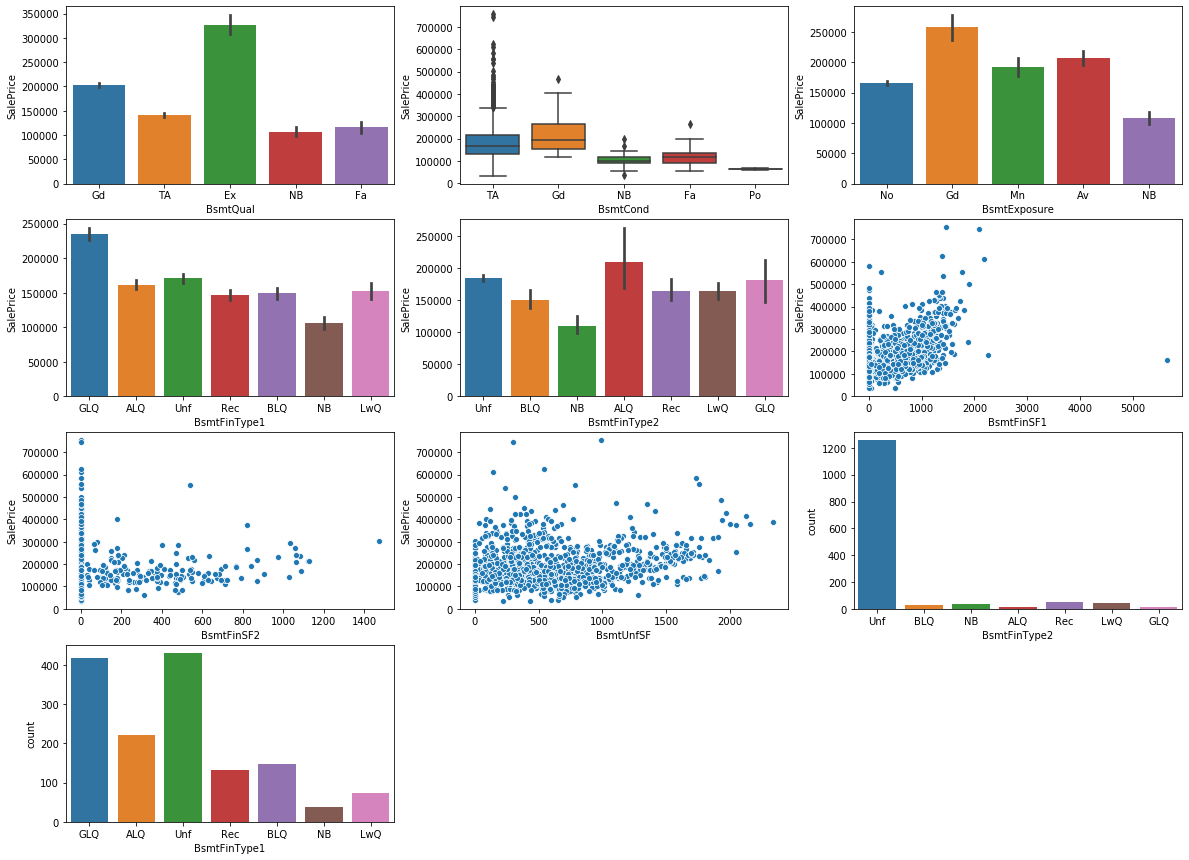

In [96]:
plt.figure(figsize=(20, 15))

plt.subplot(4,3,1)
sns.barplot(x = 'BsmtQual', y = 'SalePrice', data = df)
# Price range clearly depends on Basement quality

plt.subplot(4,3,2)
# Price range clearly depends on Basement Condition,anything Good/Average will increase the price 
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df)

plt.subplot(4,3,3)
sns.barplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
# Price range clearly depends on Basement Exposure,anything Good/Average will increase the price 

plt.subplot(4,3,4)
# Price range clearly depends on Basement Finishing ,Good Living Quarters are priced at higher rates
sns.barplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)

plt.subplot(4,3,5)
#Price range clearly depends on Basement Finishing ,Good/Average Living Quarters are priced at higher rates
sns.barplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)

plt.subplot(4,3,6)
# Trend noted with price
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df)

plt.subplot(4,3,7)
# No trend noted with price
sns.scatterplot(x = 'BsmtFinSF2', y = 'SalePrice', data = df)

plt.subplot(4,3,8)
# No trend noted with price
sns.scatterplot(x = 'BsmtUnfSF', y = 'SalePrice', data = df)

plt.subplot(4,3,9)
#Skewed Variable and can be dropped
sns.countplot(x='BsmtFinType2',data = df)

plt.subplot(4,3,10)
sns.countplot(x='BsmtFinType1',data = df)


In [97]:
# Replace String into its area of application i.e. vehicle_category (str type only)

df.BsmtFinType1[df.BsmtFinType1 == 'ALQ'] = 1
df.BsmtFinType1[df.BsmtFinType1 == 'Unf'] = 1
df.BsmtFinType1[df.BsmtFinType1 == 'Rec'] = 1
df.BsmtFinType1[df.BsmtFinType1 == 'BLQ'] = 1
df.BsmtFinType1[df.BsmtFinType1 == 'LwQ'] = 1
df.BsmtFinType1[df.BsmtFinType1 == 'GLQ'] = 2
df.BsmtFinType1[df.BsmtFinType1 == 'NB'] = 3

In [98]:
df['BsmtFinType1'] = pd.to_numeric(df['BsmtFinType1'])

In [99]:
bins=[0,1,2,3]
slot=['Low','Good','NB']
df['BsmtFinType1']=pd.cut(df['BsmtFinType1'],bins,right=True,labels=slot)

# Low ---- Basement with Low qualiy furnishing
# Good ---- Basement with Good qualiy furnishing


In [100]:
# Drop Skewed categorical Variable
df.drop(['BsmtFinSF2','BsmtFinType2'],inplace=True,axis=1)

#### Garage of House 

In [101]:
# Replacing NA with No Garage (NG)
# Meaningful Missing

df['GarageType'].fillna("NG",inplace=True)
df['GarageFinish'].fillna("NG",inplace=True)
df['GarageQual'].fillna("NG",inplace=True)
df['GarageCond'].fillna("NG",inplace=True)

In [102]:
# Calculate Garage age 

df['Garage_Age']=df['YrSold']-df['GarageYrBlt']

In [103]:
df['Garage_Age'].isnull().sum()

81

In [104]:
df.drop('GarageYrBlt',inplace=True,axis=1)

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df)
# Price range clearly depends on Garage Type

plt.subplot(3,3,2)
# Garage age has influence on Price
sns.scatterplot(x = 'Garage_Age', y = 'SalePrice', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
# Price range clearly depends on Basement Exposure,one of the reason for high Price

plt.subplot(3,3,4)
# More number of space for cars,more is the price 
sns.barplot(x = 'GarageCars', y = 'SalePrice', data = df)

plt.subplot(3,3,5)
# Median Price doent vary much with Finishig type ; Lot of outliers indicating influence of other factors
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = df)

plt.subplot(3,3,6)
# Engine Type has influence on carprice ; ohcv and dohcv technologies are used in high price range Vehicles
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)

plt.subplot(3,3,7)
# Engine Type has influence on carprice ; ohcv and dohcv technologies are used in high price range Vehicles
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df)

plt.subplot(3,3,8)
# Skewed Variable can be dropped
sns.countplot(x = 'GarageQual', data = df)

plt.subplot(3,3,9)
# Skewed Variable can be dropped
sns.countplot(x = 'GarageCond', data = df)


In [ ]:
# Drop skewed Categorical Variables
df.drop(['GarageQual','GarageCond'],inplace=True,axis=1)

#### Exploring Numerical Data

In [ ]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

In [ ]:
df_numeric.info()

#### Missing Numerical Values

In [ ]:
df.LotFrontage.describe()

In [ ]:
df.LotFrontage.fillna(value=69,inplace=True)

In [ ]:
df.MasVnrArea.describe()

In [ ]:
# Due to insufficient Data , we can drop following Numeric Columns and Respective Categorical Columns

df.drop(['MasVnrArea','MasVnrType'],inplace=True,axis=1)

In [ ]:
# dropping columns which are Numeric but are categorical in Nature
df_numeric = df_numeric.drop(['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YrSold'], axis=1)
df_numeric.head()

In [ ]:
df.Garage_Age.fillna(value=0,inplace=True)

# Plotting Correlation Heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(df_numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

In [ ]:
# Due to insufficient Data , we can drop following Numeric Columns and Respective Categorical Columns

df.drop(['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold'],inplace=True,axis=1)

## 2. Data Preparation 

#### Data Preparation

In [ ]:
# Converting required Numerical Variables to Categorical 

# converting symboling to categorical
df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','BsmtFinType1']]= df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','BsmtFinType1']].astype('object')
df.info()

In [ ]:
# split into X and y
X = df.loc[:, ['MSSubClass','MSZoning','Street','LotShape','LotConfig','Neighborhood','BldgType',
                 'HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd',
                 'ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','CentralAir',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','LotFrontage','LotArea',
                 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                 'Sold_Age','Garage_Age']]

y = df['SalePrice']


df_category = df.select_dtypes(include=['object', 'category'])

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_category = X.select_dtypes(include=['object'])
df_category.head()


In [ ]:
# convert into dummies
df_dummies = pd.get_dummies(df_category, drop_first=True)
df_dummies.head()

In [ ]:
# drop categorical variables 
X = X.drop(list(df_category.columns), axis=1)

In [ ]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [ ]:
X.info()

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3.Model Building

## 3.1 Lasso

In [ ]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,1500,2000,2500,3000,3500,4000]}


In [ ]:
# cross validation
folds = 5

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

In [ ]:
lasso.coef_

In [ ]:
Lasso_Coefficients=pd.DataFrame(X.columns,lasso.coef_)

#### Lasso Model Prediction

In [ ]:
y_train_price = model_cv.predict(X_train)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

####  Making Predictions Using the Lasso Model

In [ ]:
# predict
y_train_pred = model_cv.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = model_cv.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

####  Lasso Model

In [73]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
Final_list=list(zip(cols, model_parameters))

TypeError: 'list' object is not callable

## 3.2 Ridge

In [65]:
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    3.9s finished
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=4000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.233757,0.435532,0.003198,0.000398,0.0001,{'alpha': 0.0001},-21041.923087,-21691.896626,-22912.428418,-20016.446247,...,-21074.862967,1160.181486,29,-16473.379625,-13845.674702,-14962.229920,-16645.602486,-16007.931992,-15586.963745,1049.384891
1,0.012194,0.001719,0.002397,0.000489,0.001,{'alpha': 0.001},-21039.841455,-21691.399299,-22912.383341,-20016.174571,...,-21074.103294,1160.386340,28,-16473.690178,-13845.574802,-14962.218427,-16645.501741,-16007.950861,-15586.987202,1049.453073
2,0.010595,0.000490,0.001798,0.000400,0.01,{'alpha': 0.01},-21019.770199,-21686.492433,-22911.924076,-20013.462556,...,-21066.698769,1162.419517,27,-16476.675251,-13844.582700,-14962.119154,-16644.501743,-16008.134181,-15587.202606,1050.112365
3,0.010394,0.000490,0.001997,0.000632,0.05,{'alpha': 0.05},-20944.116549,-21666.130244,-22909.712111,-20001.515599,...,-21042.399615,1165.216994,26,-16487.876270,-13840.320157,-14961.614055,-16640.250378,-16009.064918,-15587.825156,1052.715333
4,0.009995,0.000001,0.002198,0.000979,0.1,{'alpha': 0.1},-20871.939706,-21643.833833,-22906.617828,-19988.175952,...,-21021.857850,1163.818120,25,-16497.857768,-13835.333638,-14960.815741,-16635.306367,-16011.419533,-15588.146610,1055.383840


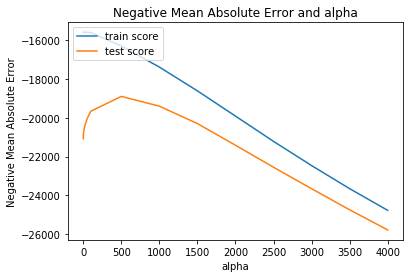

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  587.89849175,  2957.88666585,  3183.12523625,   649.04619815,
        4305.11682694,  5664.81773589,  3572.58085121,  6915.89750259,
        4211.68844971,  1896.26597469,   744.85464498, -4109.59857562,
       -1077.49127514, -1685.40166301,  -241.5737471 ,  -165.53767833,
        -419.48088691,   972.57170751,   -31.3417259 ,  -384.09954702,
        -623.05786803,  -562.73145592,  -932.50861062,  -764.33326426,
       -1444.81680461,  -506.26965276,  -773.45084161,  1128.09216505,
         -11.37028528,  1203.08416889,  -922.16328949,   532.86001475,
         514.29519959, -1514.19275682,  -467.78140827,  1704.50154116,
       -1069.97080426,  -455.75594681,  -326.26970647,   315.62533199,
        -110.84523577,  -108.74122917,   658.85345608,  -708.60942873,
        3260.33300363, -3615.72635682,   -79.41604881, -1258.68344211,
       -1185.19452711, -1081.7608212 , -1541.14263859,   127.74006162,
        -332.06656103,  5163.50837466,  5495.50790966, -2129.09290337,
      

#### Ridge Model Prediction

In [69]:
y_train_price = model_cv.predict(X_train)

Text(0.5, 0, 'Errors')

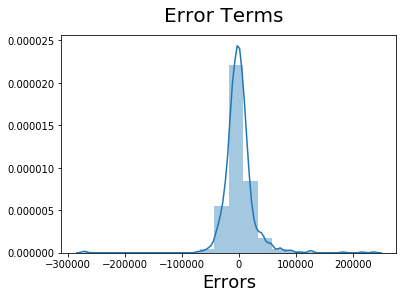

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Making Predictions Using the Ridge Model

In [71]:
# predict
y_train_pred = model_cv.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = model_cv.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8786588062282172
0.853760111234626


#### Ridge Model

In [72]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

TypeError: 'list' object is not callable